In [91]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [92]:
data = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MelHouseVal'] = data.target
print(df.shape)

(20640, 9)


In [93]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MelHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [94]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df,title="Report",explorative=True)
profile.to_file("report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 49.98it/s]


In [95]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MelHouseVal    0
dtype: int64

In [96]:
df = df.drop_duplicates()

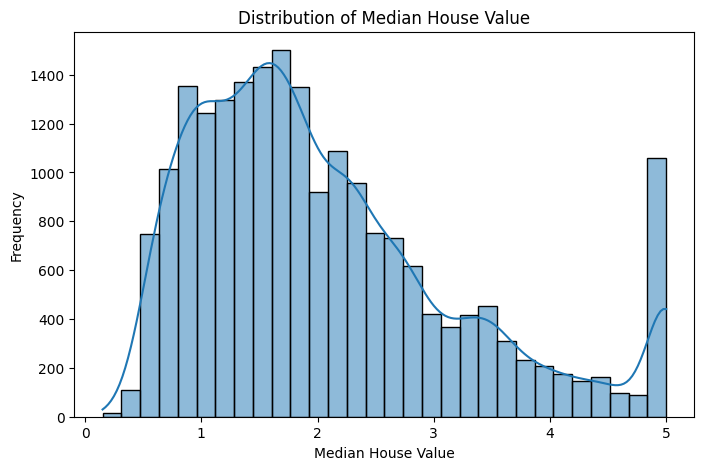

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['MelHouseVal'], bins=30, kde=True)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Value")
plt.show()


In [98]:
from sklearn.model_selection import train_test_split
target = "MelHouseVal"
x = df.drop(target,axis=1)
t = df[target]

x_train,x_test,t_train,t_test = train_test_split(x,t, test_size=0.2,random_state=42)

<Axes: >

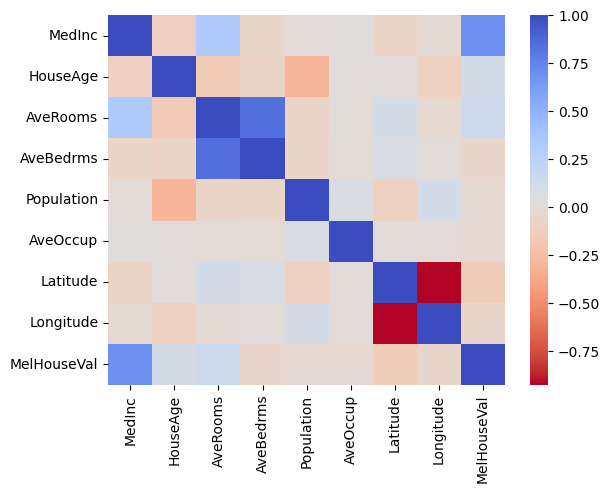

In [99]:
import numpy as np
import seaborn as sns
# Correlation in the training set
C = df.corr()
sns.heatmap(C, cmap = 'coolwarm_r')

In [100]:
df = df.drop(columns=['AveRooms', 'Latitude'])
print(df.shape)  # Kiểm tra lại kích thước DataFrame sau khi xóa cột


(20640, 7)


In [101]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scale = MinMaxScaler()

scale.fit_transform(x_train)
scale.fit(x_test)

MinMaxScaler()

In [102]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

model = GradientBoostingRegressor()
model.fit(x_train,t_train)
t_predict = model.predict(x_test)


print(r2_score(t_predict,t_test))
print("R2 Score:", r2_score(t_test, t_predict))
print("Mean Squared Error (MSE):", mean_squared_error(t_test, t_predict))
print("Mean Absolute Error (MAE):", mean_absolute_error(t_test, t_predict))


0.7000003092089477
R2 Score: 0.7755824521517652
Mean Squared Error (MSE): 0.2940787695751335
Mean Absolute Error (MAE): 0.37171553690875236


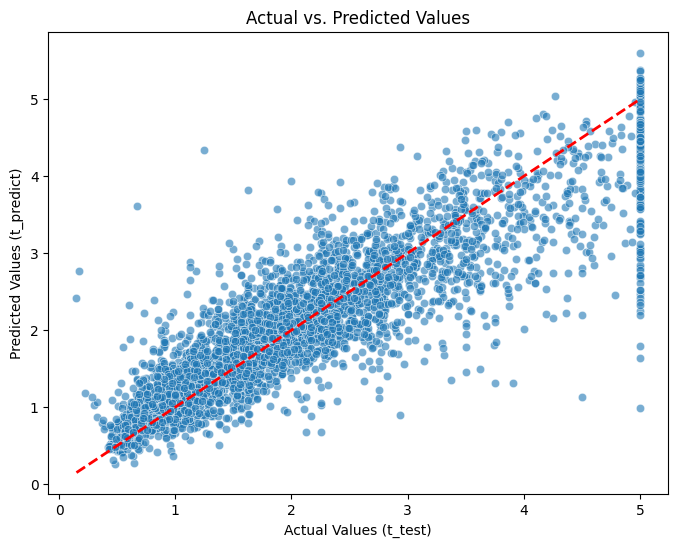

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=t_test, y=t_predict, alpha=0.6)
plt.plot([t_test.min(), t_test.max()], [t_test.min(), t_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Values (t_test)")
plt.ylabel("Predicted Values (t_predict)")
plt.title("Actual vs. Predicted Values")
plt.show()


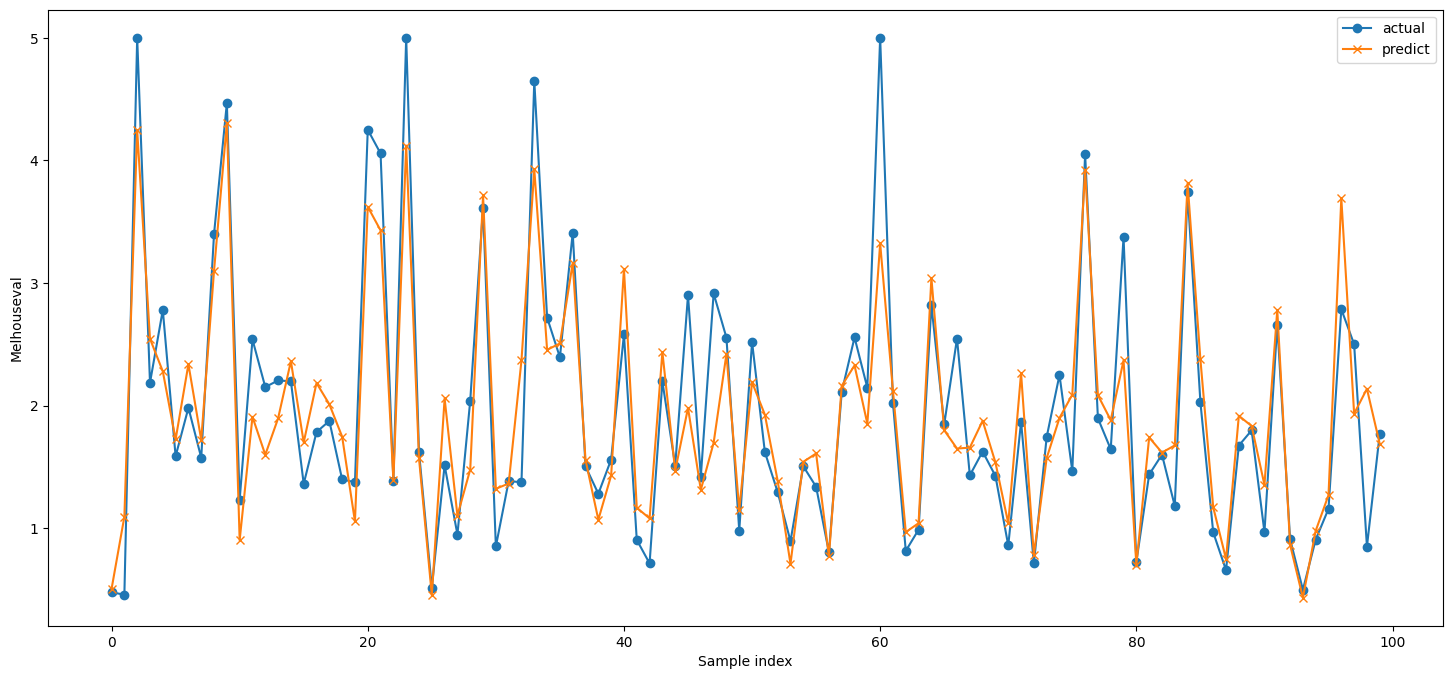

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.plot(t_test.values[:100], label="actual", marker="o")
plt.plot(t_predict[:100], label="predict", marker="x")
plt.xlabel('Sample index')
plt.ylabel('Melhouseval')
plt.legend()
plt.show()

